## Problem Statement:

### IRIS FLOWER CLASSIFICATION (K-Nearest Neighbours [KNN] Classifier)


Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.



In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

import warnings 
warnings.filterwarnings('ignore')

## 1. Data Collection

In [53]:
# Load the Iris dataset from Scikit-learn
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
print(iris.data[:10]) # key values in our model review some first 10 samples
print(iris.feature_names) # and their names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [58]:
# create a df using pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# lets see now
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [59]:
print(iris.target) # target species 
print(iris.target_names) # and their names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [60]:
# Let's make a understandable dataframe
df['species'] = iris.target_names[iris.target]

In [61]:
# see how it looks now
df # understandable

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

## 2. Data cleaning and Exploration

In [62]:
# check for null values
df.isnull().sum() # all right

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [63]:
df.describe() # basic description

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [64]:
# count aggregate according to species
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 3. Data Visualization

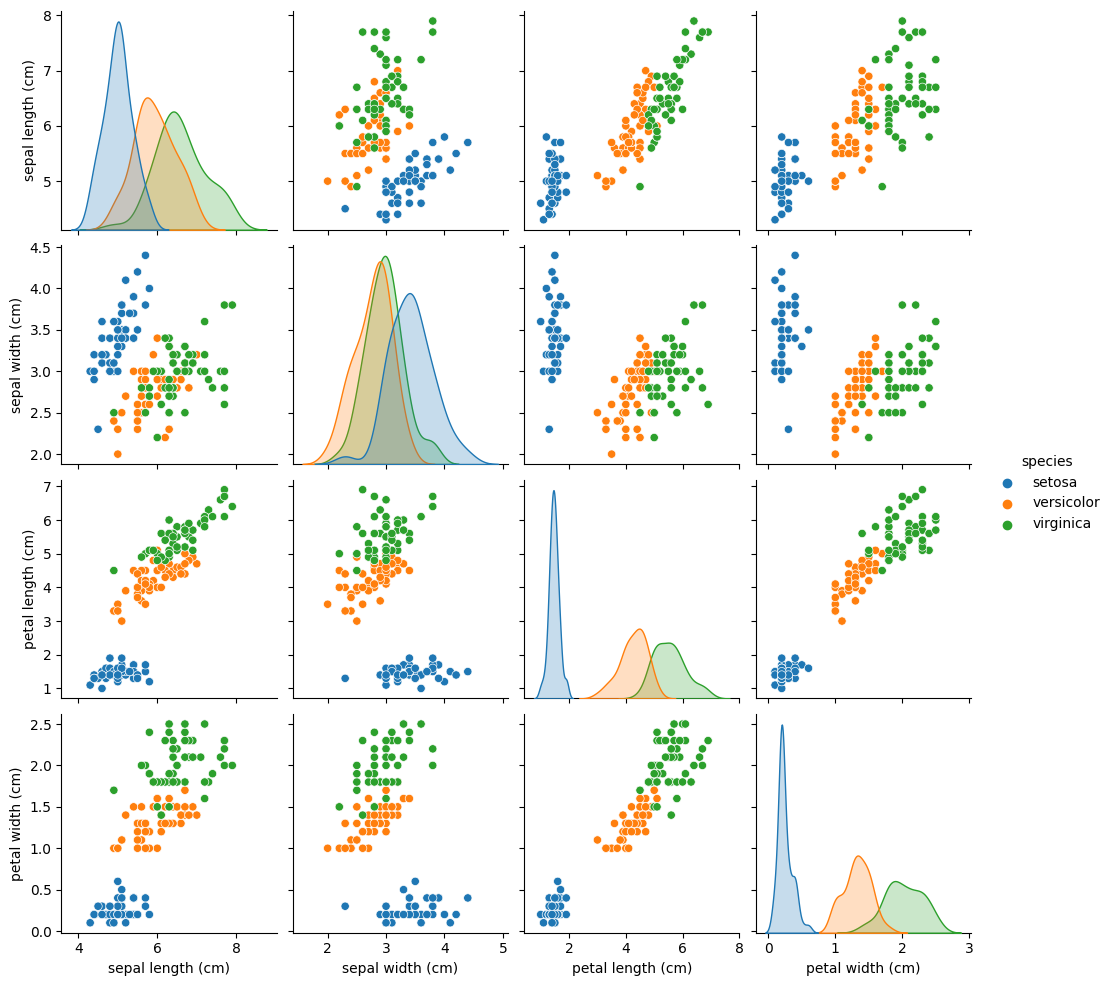

In [65]:
sns.pairplot(df, hue = 'species')

## 4. Data Preprocessing

In [131]:
# Encode the categorical target variable
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Split the data into features (X) and target variable (y)
X = df.drop(['species', 'species_encoded'], axis=1)  # features
y = df['species_encoded']  # target_variable

### 4.1 train, test, split

In [132]:
# Split the data into training and testing sets (20% testing, 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Modelling, Model training (KNN Classifier)

In [133]:
# Train a KNN Classifier
k = 4  # number of neighbors

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### 5.1 Model Evaluation

In [113]:
# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 5.2 Sample test case Prediction

In [96]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_encoded'],
      dtype='object')

In [124]:
# Sample test case
sample_test_case = np.array([[6.1, 3.6, 3.5, 4.5]])

# Predict using the trained model
predicted_species_encoded = model.predict(sample_test_case)
predicted_species = label_encoder.inverse_transform(predicted_species_encoded)

print("Predicted Iris Species:", predicted_species[0])

Predicted Iris Species: virginica


### 5.3 Plot the sample test to get instant clarity

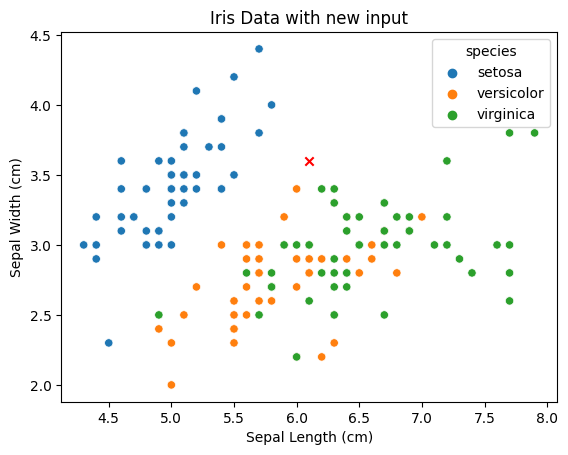

In [130]:
# Assume these are the features for the new input
new_input = [6.1, 3.6, 3.5, 4.5]

# Plot the Iris dataset features with hue for species
sns.scatterplot(x = df['sepal length (cm)'], y = df['sepal width (cm)'], hue = df['species'])

# Plot the new input
plt.scatter(new_input[0], new_input[1], c = 'red', marker = 'x')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Data with new input')
plt.show()

## 6. Conclusion

In conclusion, we successfully built and trained a K-NN model for classifying iris flowers into their respective species based on measurements of sepal and petal characteristics. The trained model demonstrated its ability to predict the species of an iris flower accurately using specific measurements. 

K-NN are effective models for classification tasks, and in this scenario, it performed well in predicting the iris species.

### Thank you OASIS Infobyte, Eventhough codes generated by AI bots, but these tasks teaches me a lot.